# Yugioh Card Game (YCG) web crawling

In [1]:
!pip install webdriver-manager selenium


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from selenium import webdriver
from selenium.webdriver.edge.options import Options

WINDOW_SIZE = "1920,1080"

options = Options()
# options.add_argument("--headless")
options.add_argument("--window-size=%s" % WINDOW_SIZE)

driver = webdriver.Edge(options=options)

In [11]:
import os
import time
import urllib

url = "https://ygoprodeck.com/card-database/"
driver.get(url)
time.sleep(5)

## Show 100 cards with grid view

In [13]:
from selenium.webdriver.common.by import By

# Grid view
grid_view = driver.find_element(By.XPATH, '//*[@title="Grid View"]').click()

# Show 100 cards per pages
driver.find_element(By.XPATH, "//select[@id='filter-limit']/option[text()='Limit 100']").click()

In [14]:
total_cards = driver.find_element(By.CLASS_NAME, "api-paging-total-cards").text
print(f"Total {total_cards} cards")

Total 12,853 cards


## Make directory

In [15]:
import os

if not os.path.exists('cards'):
    os.mkdir('cards')
    
if not os.path.exists('cropped_cards'):
    os.mkdir('cropped_cards')

os.listdir()

['.ipynb_checkpoints', 'cards', 'cropped_cards', 'main.ipynb']

# Number of pages

In [16]:
total_pages = driver.find_element(By.CLASS_NAME, "api-paging-total-pages").text
total_pages = int(total_pages)
total_pages

129

## Crawl images and save locally

In [18]:
# for idx in range(total_pages):
for idx in range(5):
    data = []
    # Take links to all cards
    card_info = driver.find_elements(By.CLASS_NAME, 'lazy')
    i = 0
    for card in card_info:
        i += 1
        print(f"Card No. #{100*idx + i}")
        card.click()
        resource_links = driver.find_elements(By.XPATH, "//div[@class='resources-bar resources-bar-links']/span/a")
        # Link card image
        card_img = resource_links[-3].get_attribute('href')

        # Link cropped card image
        card_cropped_img = resource_links[-2].get_attribute('href')
        
        # Card name
        card_name = driver.find_element(By.XPATH, "//div[@class='card-name']/h1").text
        
        # Save images
        filename = card_name.lower()
        for char in ['"', "'", "/"]:
            filename = filename.replace(char, '')
        
        filename = filename.replace(' ', '-') + '.jpg'
        
        card_filename = os.path.join('cards', filename)
        cropped_card_filename = os.path.join('cropped_cards', filename)
        
        urllib.request.urlretrieve(card_img, card_filename)
        urllib.request.urlretrieve(card_cropped_img, cropped_card_filename)
        
        data.append({
                    "name": card_name,
                    "card-image": card_filename,
                    "cropped-card-image": cropped_card_filename
                    })
        
        # time.sleep(1)
        # Go back
        driver.execute_script("window.history.go(-1)")
    
    time.sleep(2)
    driver.find_element(By.XPATH, "//button[@id='nextPage2']").click()
    time.sleep(2)
    
driver.close()

Card No. #1
Card No. #2
Card No. #3
Card No. #4
Card No. #5
Card No. #6
Card No. #7
Card No. #8
Card No. #9
Card No. #10
Card No. #11
Card No. #12
Card No. #13
Card No. #14
Card No. #15
Card No. #16
Card No. #17
Card No. #18
Card No. #19
Card No. #20
Card No. #21
Card No. #22
Card No. #23
Card No. #24
Card No. #25
Card No. #26
Card No. #27
Card No. #28
Card No. #29
Card No. #30
Card No. #31
Card No. #32
Card No. #33
Card No. #34
Card No. #35
Card No. #36
Card No. #37
Card No. #38
Card No. #39
Card No. #40
Card No. #41
Card No. #42
Card No. #43
Card No. #44
Card No. #45
Card No. #46
Card No. #47
Card No. #48
Card No. #49
Card No. #50
Card No. #51
Card No. #52
Card No. #53
Card No. #54
Card No. #55
Card No. #56
Card No. #57
Card No. #58
Card No. #59
Card No. #60
Card No. #61
Card No. #62
Card No. #63
Card No. #64
Card No. #65
Card No. #66
Card No. #67
Card No. #68
Card No. #69
Card No. #70
Card No. #71
Card No. #72
Card No. #73
Card No. #74
Card No. #75
Card No. #76
Card No. #77
Card No.

## Save JSON file

In [19]:
import json

with open('data.json', 'w') as outfile:
    for json_data in data:
        json.dump(json_data, outfile, indent=4)

## Show results

In [115]:
import matplotlib.pyplot as plt
import glob
from PIL import Image
import random

In [119]:
card_list = glob.glob("cards/*.jpg")

cropped_card_list = glob.glob("cropped_cards/*.jpg")

random.seed(3843)
idx = [random.randint(0, len(card_list)) for _ in range(4)]
card_list = [card_list[i] for i in idx]
cropped_card_list = [cropped_card_list[i] for i in idx]

Some image from `cards` folder

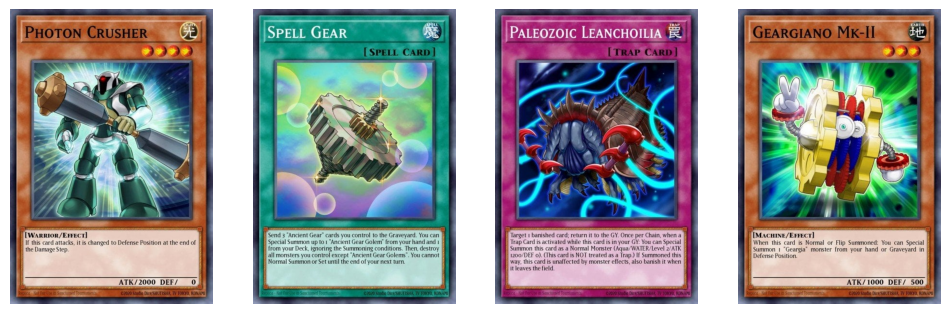

In [120]:
fig, ax = plt.subplots(1, 4, figsize=(12, 8))

for i in range(4):
    img = Image.open(card_list[i])
    ax[i].imshow(img)
    ax[i].axis('off')

Some image from `cropped_cards` folder

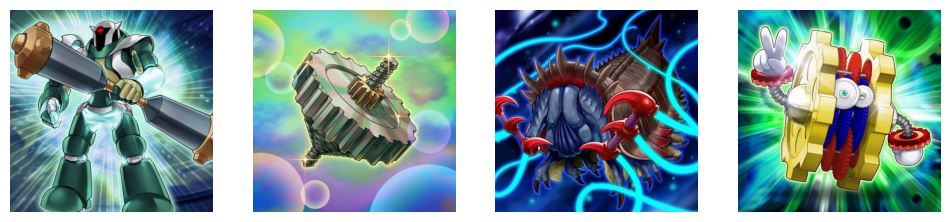

In [121]:
fig, ax = plt.subplots(1, 4, figsize=(12, 8))

for i in range(4):
    img = Image.open(cropped_card_list[i])
    ax[i].imshow(img)
    ax[i].axis('off')